# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid=c69920e822cf490cd297f2fe22b3255e&units={units}&q="


# set up lists to hold reponse info
city_name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f"Processing Records for {city}")
 
    except (KeyError, IndexError):
        print(f"aint got it homie ... skipping {city}.")


Processing Records for kingaroy
Processing Records for porto novo
Processing Records for durango
Processing Records for busselton
Processing Records for atuona
Processing Records for senador jose porfirio
Processing Records for rabo de peixe
Processing Records for cidreira
Processing Records for ketchikan
Processing Records for leh
aint got it homie ... skipping taolanaro.
Processing Records for noumea
aint got it homie ... skipping tuggurt.
Processing Records for benjamin constant
Processing Records for gat
Processing Records for kruisfontein
Processing Records for puerto ayora
Processing Records for esperance
Processing Records for idah
Processing Records for zhigansk
Processing Records for soria
Processing Records for saskylakh
Processing Records for san patricio
Processing Records for cape town
Processing Records for dikson
Processing Records for harper
Processing Records for husavik
Processing Records for namibe
Processing Records for zyryanka
Processing Records for west bay
Proce

Processing Records for port elizabeth
Processing Records for road town
Processing Records for trelew
Processing Records for samur
Processing Records for longyearbyen
aint got it homie ... skipping viligili.
Processing Records for san lawrenz
Processing Records for port hardy
aint got it homie ... skipping dien bien.
Processing Records for makakilo city
Processing Records for vanimo
Processing Records for aginskoye
Processing Records for naryan-mar
Processing Records for mayo
Processing Records for vung tau
Processing Records for fairbanks
Processing Records for barcelona
Processing Records for shimoda
aint got it homie ... skipping amderma.
aint got it homie ... skipping mrirt.
Processing Records for pervomayskiy
Processing Records for straseni
aint got it homie ... skipping bairiki.
aint got it homie ... skipping schwedt.
Processing Records for teknaf
Processing Records for bethel
Processing Records for pirapora
Processing Records for khorixas
Processing Records for port lincoln
Proce

Processing Records for miandrivazo
Processing Records for limoeiro do ajuru
Processing Records for bamiantong
Processing Records for vredendal
Processing Records for viedma
Processing Records for manavalakurichi
Processing Records for hasaki
Processing Records for sitka
Processing Records for aksu
Processing Records for conchas
Processing Records for qianguo
aint got it homie ... skipping toliary.
Processing Records for mocorito
Processing Records for meaux
Processing Records for havre-saint-pierre
Processing Records for ust-nera
Processing Records for hay river
Processing Records for romilly-sur-seine
Processing Records for mumford
Processing Records for brasilia
Processing Records for lensk
aint got it homie ... skipping tonj.
Processing Records for taoudenni
Processing Records for asyut
Processing Records for toba
Processing Records for salvador
Processing Records for kysyl-syr
Processing Records for edeia
Processing Records for chimbote
Processing Records for powell
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert data to a DataFrame
weather_dict = {
    "city":city_name,
    "cloudiness":clouds,
    "country":country,
    "date":date,
    "humidity":humidity,
    "lat":lat,
    "lng":lng,
    "max_temp":temp,
    "wind":wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind
0,Kingaroy,48,AU,1541828453,42,-26.54,151.84,25.17,4.31
1,Porto Novo,75,BR,1541826000,100,-23.68,-45.44,18.00,1.00
2,Durango,1,US,1541825580,41,37.28,-107.88,-5.60,1.26
3,Busselton,0,AU,1541828454,68,-33.64,115.35,24.52,6.83
4,Atuona,0,PF,1541828454,100,-9.80,-139.03,26.85,4.26


In [5]:
# write DF to CSV
weather_data.to_csv("output_data/cities.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

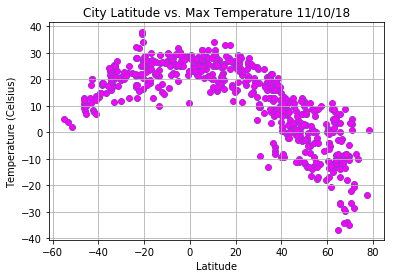

In [6]:
# you like the 80s?
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o", facecolors="magenta", edgecolors="darkorchid")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 11/10/18")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

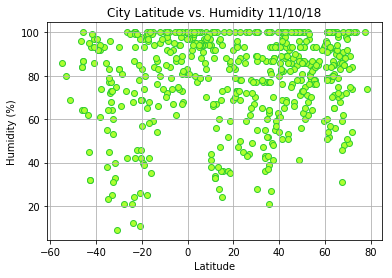

In [7]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", facecolors="greenyellow", edgecolors="limegreen")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 11/10/18")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

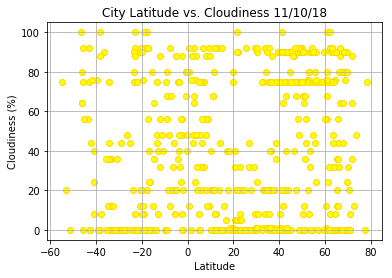

In [8]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", facecolors="yellow", edgecolors="gold")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 11/10/18")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

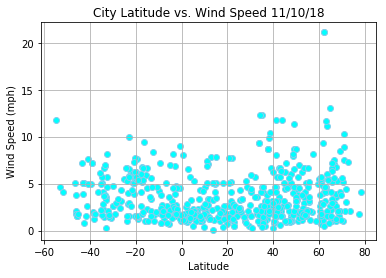

In [9]:
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o", facecolors="aqua", edgecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 11/10/18")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed_Latitude.png")

# Show plot
plt.show()